In [1]:
# import the modules
import os
from nilearn import datasets 
from nilearn import plotting as nplot
from nilearn import image as nimg
from nilearn.maskers import NiftiLabelsMasker
from nilearn.connectome import ConnectivityMeasure
from nilearn.interfaces.fmriprep import load_confounds
import nibabel as nib
import numpy as np
import pandas as pd
import bids
import matplotlib.pyplot as plt


In [2]:
# change to working dir
data_dir ='/Users/wang/Desktop/Research_projects/BBSC/Functional/Parcellation/data/cleaned_data'
os.chdir(data_dir)

In [3]:
# load atlas
atlas_yeo = datasets.fetch_atlas_yeo_2011()
atlas_filepath = atlas_yeo.thin_7
atlas_labels = atlas_yeo.colors_7

In [11]:
# explore the atlas
print (atlas_yeo.keys())
print (atlas_yeo.description)
print (atlas_yeo.colors_7)
print (atlas_yeo.thick_7)

with open(atlas_yeo.colors_7) as f: # The with keyword automatically closes the file when you are done
        print (f.read())

dict_keys(['description', 'thin_7', 'thick_7', 'thin_17', 'thick_17', 'colors_7', 'colors_17', 'anat'])
/Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_ColorLUT.txt
/Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm_LiberalMask.nii.gz
Yeo 2011 Atlas


Notes
-----
This atlas provides a labeling of some cortical voxels in the MNI152
space.

Four versions of the atlas are available, according to the cortical
model (thick or thin cortical surface) and to the number of regions
considered (7 or 17).

Content
-------
    :'anat': Background anatomical image for reference and visualization
    :'thin_7': Cortical parcelation into 7 regions, thin cortical model
    :'thin_17': Cortical parcelation into 17 regions, thin cortical model
    :'thick_7': Cortical parcelation into 17 regions, thick cortical model
    :'thick_17': Cortical parcelation into 17 regions, thick cortical model
    :'colors_7': Text fil

In [ ]:
#just to show the atlas, not necessary need to do this

#Define where to slice the image
cut_coords = (8, -4, 9)
#Show a colorbar
colorbar=True
#Color scheme to show when viewing image
cmap='Paired'

#Plot all parcellation schemas referred to by atlas_yeo_2011
nplot.plot_roi(atlas_yeo.thin_7, cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_7')
nplot.plot_roi(atlas_yeo.thin_17, cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thin_17')
nplot.plot_roi(atlas_yeo.thick_7, cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_7')
nplot.plot_roi(atlas_yeo.thick_17, cut_coords=cut_coords, colorbar=colorbar, cmap=cmap, title='thick_17')

In [4]:
# extract the data form the atlas, sub3 was excluded because head movement
import glob
sub_list = ['sub-01','sub-02']
masker = NiftiLabelsMasker(labels_img=atlas_yeo.thin_7,verbose=3)
all_data = []

for subi,sub_name in enumerate(sub_list):
    data_path = glob.glob('./'+ sub_name + '/*.nii.gz')
    data_path = sorted(data_path)
    all_ses_data = []
    
    for datai, data_name in enumerate(data_path):
        time_series = masker.fit_transform (data_name)
        all_ses_data.append(time_series)

    all_data.append (all_ses_data)    
    
print(len(all_ses_data))    
print(len(all_data))    

[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
Resampling labels
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-01/sub-01_ses-01_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-01/sub-01_ses-02_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data fro

[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-01/sub-01_ses-19_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-01/sub-01_ses-20_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals


[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-01/sub-01_ses-36_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-01/sub-01_ses-37_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-01/s

[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-02/sub-02_ses-16_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-02/sub-02_ses-17_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-02/s

[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-02/sub-02_ses-34_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-02/sub-02_ses-35_task-rest_space-MNI152NLin6Asym_res-2_desc-preproc_bold_clean_normalized.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Extracting region signals
[NiftiLabelsMasker.transform_single_imgs] Cleaning extracted signals
[NiftiLabelsMasker.fit_transform] loading data from /Users/wang/nilearn_data/yeo_2011/Yeo_JNeurophysiol11_MNI152/Yeo2011_7Networks_MNI152_FreeSurferConformed1mm.nii.gz
[NiftiLabelsMasker.transform_single_imgs] Loading data from sub-02/s

In [40]:
#--------- extract the data, here compute the data from subject 2
sub_data = all_data[0]
sub_all_data = np.array(sub_data)

session2delete = [10,13] # session 11 and 14 were deleted because sleep for sub1
# session2delete = [9,11,12,13,14,19,21,22,27,29,34,37] # sessions 10,12-15,20,22,23,28,30,35,38 were deleted for sub2
sub_all_data = np.delete(sub_all_data, session2delete, axis=0) # session * fmri_data * networks

# sub_all_data [session2delet,:,:] = np.nan
sub_all_data_avg = np.nanmean(sub_all_data, axis=0)
# sub_all_data [session2delet,:,:] = 0

<AxesSubplot:>

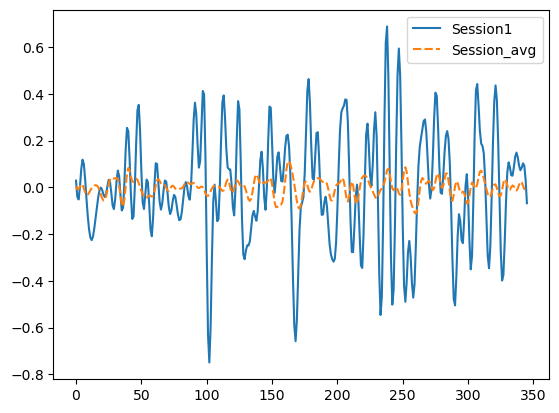

In [41]:
# plot the first network time course in the first session
import seaborn as sns
data2plot = pd.DataFrame(
                        {"Session1":np.squeeze(sub_all_data[0,:,0]),
                        "Session_avg":sub_all_data_avg[:,0]}
                        )
sns.lineplot(data=data2plot[['Session1','Session_avg']])

In [42]:
# compute the inter session variablity for different networks
correlation_measure = ConnectivityMeasure(kind='correlation')

labels=np.arange(1, 38+1).tolist() # for sub1
# labels=np.arange(1, 40+1).tolist()   # for sub2

labels=np.delete(labels, session2delete) 

net_corr = []

import matplotlib.pyplot as plt

for neti in range(sub_all_data.shape[2]):
    
    net_time_series = np.transpose(np.squeeze(sub_all_data[:,:,neti]))


    correlation_matrix = correlation_measure.fit_transform([net_time_series])[0]
    np.fill_diagonal(correlation_matrix, 0)
    nplot.plot_matrix(correlation_matrix, figure=(5, 5), labels=labels,
                     vmax=0.2, vmin=-0.2, title=None,
                     reorder=False)
    plt.savefig('/Users/wang/Desktop/UiB/Manuscripts/BBSC/Long_night/figures/' + f'Network_{neti+1}.tiff', dpi=300)
    plt.close()


In [43]:
# compute the correlaiton between each session and session average
ses_corr = []
for sesi in range(sub_all_data.shape[0]):
    df1 = pd.DataFrame(np.squeeze(sub_all_data[sesi,:,:]))
    df2 = pd.DataFrame(sub_all_data_avg)
    df_corr = df1.corrwith(df2)
    ses_corr.append(df_corr)
ses_corr = np.array(ses_corr)

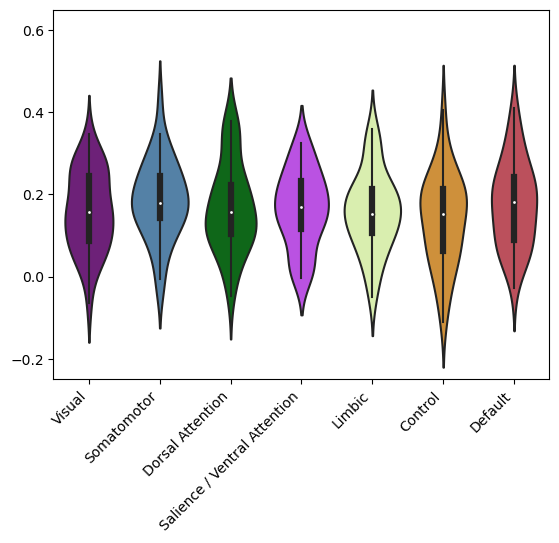

In [48]:
import seaborn as sns
corr_map=pd.DataFrame(ses_corr,columns=['Visual', 'Somatomotor', 'Dorsal Attention',
                                        'Salience / Ventral Attention',
                                        'Limbic','Control','Default'])

network_colors = {
    'Visual': (120, 18, 134),
    'Somatomotor': (70, 130, 180),
    'Dorsal Attention': (0, 118, 14),
    'Salience': (196, 58, 250),
    'Limbic': (220, 248, 164),
    'Control': (230, 148, 34),
    'Default': (205, 62, 78),
}

# Assuming corr_map is your data for the violin plot

# Convert RGB values to normalized [0, 1] range
normalized_colors = [(r / 255, g / 255, b / 255) for r, g, b in network_colors.values()]

#plt.figure(figsize=(3, 3))
network_plots = sns.violinplot(corr_map, palette=normalized_colors)
network_plots.set_xticklabels(network_plots.get_xticklabels(), rotation=45, ha='right')
plt.yticks([-0.2, 0, 0.2, 0.4, 0.6])
plt.ylim(-0.25, 0.65)

plt.savefig('/Users/wang/Desktop/UiB/Manuscripts/BBSC/Long_night/figures/Network_corr.tiff', dpi=300)
plt.show()



In [49]:
corr_map


,Visual,Somatomotor,Dorsal Attention,Salience / Ventral Attention,Limbic,Control,Default
0,0.279384,0.297452,0.170977,0.191166,0.227525,0.091202,0.181342
1,0.010509,-0.031145,0.346242,0.154482,0.198850,-0.061826,0.025173
2,0.123946,0.097714,0.159031,0.231843,0.048866,0.265019,0.063091
3,0.145594,0.170225,0.125702,0.237102,0.122544,0.164932,0.341750
4,0.294013,0.158604,0.163649,0.296916,0.144701,0.197478,0.310566
5,0.173550,0.073586,0.214768,-0.002342,0.229837,0.268731,0.298010
6,0.053103,0.346750,0.058072,0.043797,0.203437,0.219215,0.080813
7,0.037909,0.198550,0.092809,0.190023,-0.049593,0.048184,0.230638
8,0.181982,0.146996,0.114511,0.193030,0.178754,0.320671,0.046943
9,0.253765,0.043445,0.120756,0.235484,0.041344,0.179163,0.132721


In [51]:
net7_corr = pd.DataFrame (correlation_matrix)
net7_corr

,0,1,2,3,4,5,6,7,8,9,...,26,27,28,29,30,31,32,33,34,35
0,0.000000,-0.027708,0.007277,0.088408,-0.059847,-0.059151,-0.099860,-0.064731,-0.051178,-0.101416,...,0.088592,-0.028810,0.093957,0.129393,0.000100,-0.042198,-0.113717,0.076992,0.106259,-0.010400
1,-0.027708,0.000000,-0.083066,0.070047,0.044004,-0.048546,-0.005376,0.212470,-0.006873,-0.019995,...,0.040505,0.021493,-0.049835,0.009340,-0.042812,-0.115646,-0.119195,-0.053306,-0.067123,0.200759
2,0.007277,-0.083066,0.000000,0.069157,0.061989,0.072032,0.053700,-0.082076,-0.066649,0.032397,...,-0.015835,-0.002417,0.090510,0.068265,0.060635,-0.063025,0.060907,-0.200289,0.182413,-0.084991
3,0.088408,0.070047,0.069157,0.000000,0.014220,0.014779,0.038377,-0.013122,0.002285,0.068131,...,-0.066910,0.065064,0.102250,0.052871,0.007651,0.094738,0.015896,-0.081328,-0.037688,0.172333
4,-0.059847,0.044004,0.061989,0.014220,0.000000,-0.036848,-0.012194,-0.000193,-0.034175,0.057092,...,0.099004,-0.093431,0.073415,0.096025,0.073425,0.012559,0.009306,-0.039874,0.212895,-0.121831
5,-0.059151,-0.048546,0.072032,0.014779,-0.036848,0.000000,-0.062825,0.099490,-0.087463,0.029248,...,-0.081126,0.002974,0.072270,-0.100026,0.141022,0.027030,0.175516,0.048971,-0.079858,0.149658
6,-0.099860,-0.005376,0.053700,0.038377,-0.012194,-0.062825,0.000000,-0.016537,-0.095875,0.017666,...,0.096631,-0.034452,0.085385,-0.051218,-0.104455,0.107013,0.046902,-0.129324,0.104916,-0.062356
7,-0.064731,0.212470,-0.082076,-0.013122,-0.000193,0.099490,-0.016537,0.000000,-0.065746,-0.048295,...,0.151943,0.003044,-0.149291,0.020393,-0.030026,-0.032075,-0.030204,0.169375,-0.052928,0.082426
8,-0.051178,-0.006873,-0.066649,0.002285,-0.034175,-0.087463,-0.095875,-0.065746,0.000000,-0.009915,...,-0.132899,0.071881,-0.059630,0.086183,0.010403,0.022374,-0.052934,0.130557,-0.041053,-0.090637
9,-0.101416,-0.019995,0.032397,0.068131,0.057092,0.029248,0.017666,-0.048295,-0.009915,0.000000,...,-0.094031,-0.035476,-0.112260,-0.059832,0.115308,0.058191,-0.080123,-0.182185,0.151426,0.035622


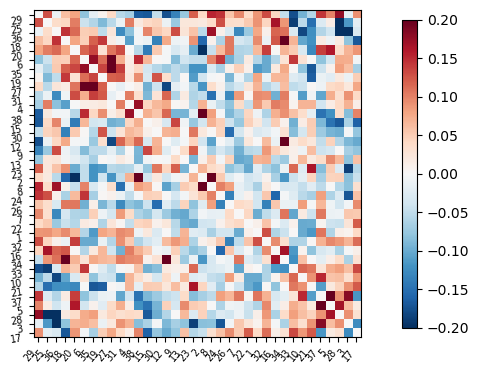

In [52]:
nplot.plot_matrix(correlation_matrix, figure=(5, 5), labels=labels,
                     vmax=0.2, vmin=-0.2, title=None,
                     reorder=True)